<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Coding/blob/main/exporting_latent_codes_pca_t_sne_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
"""import json
from keras.utils.data_utils import get_file
from keras import backend as K

CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'


def preprocess_input(x, dim_ordering='default'):
    if dim_ordering == 'default':
        dim_ordering = K.set_image_data_format('channels_first')
    assert dim_ordering in {'tf', 'th'}

    if dim_ordering == 'th':
        x[:, 0, :, :] -= 103.939
        x[:, 1, :, :] -= 116.779
        x[:, 2, :, :] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, ::-1, :, :]
    else:
        x[:, :, :, 0] -= 103.939
        x[:, :, :, 1] -= 116.779
        x[:, :, :, 2] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, :, :, ::-1]
    return x


def decode_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',
                         CLASS_INDEX_PATH,
                         cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        results.append(result)
    return results"""

"import json\nfrom keras.utils.data_utils import get_file\nfrom keras import backend as K\n\nCLASS_INDEX = None\nCLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'\n\n\ndef preprocess_input(x, dim_ordering='default'):\n    if dim_ordering == 'default':\n        dim_ordering = K.set_image_data_format('channels_first')\n    assert dim_ordering in {'tf', 'th'}\n\n    if dim_ordering == 'th':\n        x[:, 0, :, :] -= 103.939\n        x[:, 1, :, :] -= 116.779\n        x[:, 2, :, :] -= 123.68\n        # 'RGB'->'BGR'\n        x = x[:, ::-1, :, :]\n    else:\n        x[:, :, :, 0] -= 103.939\n        x[:, :, :, 1] -= 116.779\n        x[:, :, :, 2] -= 123.68\n        # 'RGB'->'BGR'\n        x = x[:, :, :, ::-1]\n    return x\n\n\ndef decode_predictions(preds, top=5):\n    global CLASS_INDEX\n    if len(preds.shape) != 2 or preds.shape[1] != 1000:\n        raise ValueError('`decode_predictions` expects '\n                         'a batch o

## Import Packages

In [2]:
import skimage
import cv2
import os
import numpy as np
from sklearn import manifold, datasets
import pickle as pkl

import keras
from keras.preprocessing import image
from keras.models import Model
from keras.applications.vgg19 import VGG19
from skimage.transform import resize
#import imagenet_utils as imu
from keras.applications import imagenet_utils as imu

import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

In [3]:
import cv2 as cv
from glob import glob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [4]:
PATH = '/content/drive/My Drive/aa_images/28-nov/' #@param{type:'string'}

#images = [cv.imread(file, cv.COLOR_BGR2RGB) for file in glob(PATH + '/*.jpg')]
#print(len(images))

In [5]:
#@title
"""rootfolder = PATH
file_list = os.listdir(rootfolder)
print(file_list)"""

'rootfolder = PATH\nfile_list = os.listdir(rootfolder)\nprint(file_list)'

In [6]:
#@title
"""file_list_sorted = file_list.sort()
print(file_list_sorted)"""

'file_list_sorted = file_list.sort()\nprint(file_list_sorted)'

In [7]:
#@title
"""
#rootfolder = 'D:\\COMPUTER_VISION\\AAPR\\10000_imgs_aa_barrel_vault'
file_list = []
for i in range(len(os.listdir(rootfolder))):
  file_list.append(plt.imread(PATH + str(i+10000) + '.jpg'))

print(file_list)"""

"\n#rootfolder = 'D:\\COMPUTER_VISION\\AAPR\\10000_imgs_aa_barrel_vault'\nfile_list = []\nfor i in range(len(os.listdir(rootfolder))):\n  file_list.append(plt.imread(PATH + str(i+10000) + '.jpg'))\n\nprint(file_list)"

In [8]:
#np.array(file_list)

### Preview

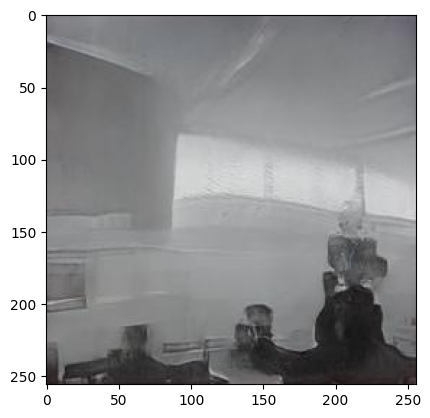

In [9]:
# Initialise the image stack with the first image
img = cv.imread(PATH + '0.jpg') # Mind the naming pattern
#print(img)
plt.imshow(img)

## PCA (principal component analysis)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition as dp
import imageio
from skimage import io,transform,color
from skimage import img_as_ubyte
#from sklearn.datasets.base import load_iris
from PIL import Image
import cv2 as cv

In [11]:
num_imgs = 64 #@param{type:'integer'}

In [12]:
img_gray = color.rgb2gray(img) # Convert rgb image to greyscale
"""
#img_gray = img

# Set the new size for the image
new_size = (256, 256)

# Resize the image
img_gray = cv2.resize(img_gray, new_size, interpolation=cv2.INTER_AREA)
"""
im_stack = np.asarray(img_gray)

# print(str(im_stack) + '__1')


# Concatenate additional images to the stack
for i in range(0, num_imgs):
    img = cv.imread(PATH + str(i) + '.jpg')
    img_gray = color.rgb2gray(img)

    # Set the new size for the image
    new_size = (256, 256)

    # Normalise/Resize the image
    img_gray = cv2.resize(img_gray, new_size, interpolation=cv2.INTER_AREA)

    im_array = np.asarray(img_gray)
    im_stack = np.append(im_stack, im_array)

    # Display the image
    plt.figure(figsize=(1, 1), dpi=32)
    plt.imshow(img_gray, cmap='gray')
    plt.axis('off')
    plt.show()

    print(str(im_stack) + '__' + str(i))
    print(len(im_stack))

[0.55490549 0.54314078 0.53137608 ... 0.18394784 0.21139882 0.25453608]__0
131072


[0.55490549 0.54314078 0.53137608 ... 0.19688902 0.21257529 0.23218314]__1
196608


[0.55490549 0.54314078 0.53137608 ... 0.31033176 0.37307686 0.46327294]__2
262144


[0.55490549 0.54314078 0.53137608 ... 0.64702118 0.62349176 0.69015843]__3
327680


[0.55490549 0.54314078 0.53137608 ... 0.12040706 0.10920784 0.09352157]__4
393216


[0.55490549 0.54314078 0.53137608 ... 0.24394784 0.25571255 0.29492824]__5
458752


[0.55490549 0.54314078 0.53137608 ... 0.13414392 0.12630078 0.11845765]__6
524288


[0.55490549 0.54314078 0.53137608 ... 0.08349098 0.08741255 0.08741255]__7
589824


[0.55490549 0.54314078 0.53137608 ... 0.14645922 0.14253765 0.13077294]__8
655360


[0.55490549 0.54314078 0.53137608 ... 0.55312588 0.59234157 0.62763569]__9
720896


[0.55490549 0.54314078 0.53137608 ... 0.13243961 0.13243961 0.1206749 ]__10
786432


[0.55490549 0.54314078 0.53137608 ... 0.52718667 0.52718667 0.52718667]__11
851968


[0.55490549 0.54314078 0.53137608 ... 0.19331765 0.19752196 0.23114941]__12
917504


[0.55490549 0.54314078 0.53137608 ... 0.41738275 0.42914745 0.44483373]__13
983040


[0.55490549 0.54314078 0.53137608 ... 0.22559098 0.26874314 0.30403725]__14
1048576


[0.55490549 0.54314078 0.53137608 ... 0.12685137 0.14645922 0.15038078]__15
1114112


[0.55490549 0.54314078 0.53137608 ... 0.62861176 0.6364549  0.6364549 ]__16
1179648


[0.55490549 0.54314078 0.53137608 ... 0.39374824 0.37414039 0.44472863]__17
1245184


[0.55490549 0.54314078 0.53137608 ... 0.17759373 0.24033882 0.22465255]__18
1310720


[0.55490549 0.54314078 0.53137608 ... 0.1181749  0.12209647 0.12601804]__19
1376256


[0.55490549 0.54314078 0.53137608 ... 0.1400149  0.18763922 0.19548235]__20
1441792


[0.55490549 0.54314078 0.53137608 ... 0.24516902 0.23230314 0.26759725]__21
1507328


[0.55490549 0.54314078 0.53137608 ... 0.15768824 0.1932651  0.15404941]__22
1572864


[0.55490549 0.54314078 0.53137608 ... 0.14450196 0.15766549 0.15374392]__23
1638400


[0.55490549 0.54314078 0.53137608 ... 0.24562941 0.26523725 0.2848451 ]__24
1703936


[0.55490549 0.54314078 0.53137608 ... 0.08424196 0.07639882 0.06463412]__25
1769472


[0.55490549 0.54314078 0.53137608 ... 0.12209647 0.1181749  0.10248863]__26
1835008


[0.55490549 0.54314078 0.53137608 ... 0.12545255 0.11760941 0.10192314]__27
1900544


[0.55490549 0.54314078 0.53137608 ... 0.20983725 0.21292549 0.19331765]__28
1966080


[0.55490549 0.54314078 0.53137608 ... 0.13861608 0.13469451 0.13077294]__29
2031616


[0.55490549 0.54314078 0.53137608 ... 0.11953608 0.11561451 0.09992824]__30
2097152


[0.55490549 0.54314078 0.53137608 ... 0.13382353 0.23186275 0.21617647]__31
2162688


[0.55490549 0.54314078 0.53137608 ... 0.49813647 0.49813647 0.50205804]__32
2228224


[0.55490549 0.54314078 0.53137608 ... 0.16466824 0.16074667 0.16466824]__33
2293760


[0.55490549 0.54314078 0.53137608 ... 0.16214549 0.16998863 0.14253765]__34
2359296


[0.55490549 0.54314078 0.53137608 ... 0.24426039 0.2560251  0.19328   ]__35
2424832


[0.55490549 0.54314078 0.53137608 ... 0.41765059 0.41765059 0.41765059]__36
2490368


[0.55490549 0.54314078 0.53137608 ... 0.33582549 0.33582549 0.36327647]__37
2555904


[0.55490549 0.54314078 0.53137608 ... 0.51312941 0.59156078 0.57587451]__38
2621440


[0.55490549 0.54314078 0.53137608 ... 0.14645922 0.13469451 0.11508667]__39
2686976


[0.55490549 0.54314078 0.53137608 ... 0.29547882 0.30332196 0.33861608]__40
2752512


[0.55490549 0.54314078 0.53137608 ... 0.09777843 0.16836667 0.24679804]__41
2818048


[0.55490549 0.54314078 0.53137608 ... 0.48518824 0.4773451  0.47342353]__42
2883584


[0.55490549 0.54314078 0.53137608 ... 0.12685137 0.11508667 0.09155725]__43
2949120


[0.55490549 0.54314078 0.53137608 ... 0.12175333 0.14920431 0.20802784]__44
3014656


[0.55490549 0.54314078 0.53137608 ... 0.20920431 0.21704745 0.21312588]__45
3080192


[0.55490549 0.54314078 0.53137608 ... 0.15736784 0.17305412 0.18874039]__46
3145728


[0.55490549 0.54314078 0.53137608 ... 0.21139882 0.22316353 0.23100667]__47
3211264


[0.55490549 0.54314078 0.53137608 ... 0.14253765 0.13469451 0.12685137]__48
3276800


[0.55490549 0.54314078 0.53137608 ... 0.43218314 0.49100667 0.51453608]__49
3342336


[0.55490549 0.54314078 0.53137608 ... 0.14170431 0.14170431 0.13386118]__50
3407872


[0.55490549 0.54314078 0.53137608 ... 0.11169294 0.1038498  0.09600667]__51
3473408


[0.55490549 0.54314078 0.53137608 ... 0.67892157 0.64754902 0.67892157]__52
3538944


[0.55490549 0.54314078 0.53137608 ... 0.05210353 0.09525569 0.20113804]__53
3604480


[0.55490549 0.54314078 0.53137608 ... 0.69155725 0.7739102  0.68371412]__54
3670016


[0.55490549 0.54314078 0.53137608 ... 0.2920851  0.3548302  0.39796745]__55
3735552


[0.55490549 0.54314078 0.53137608 ... 0.29948275 0.29163961 0.28771804]__56
3801088


[0.55490549 0.54314078 0.53137608 ... 0.12209647 0.12209647 0.12209647]__57
3866624


[0.55490549 0.54314078 0.53137608 ... 0.38647059 0.61       0.61784314]__58
3932160


[0.55490549 0.54314078 0.53137608 ... 0.19668078 0.17597176 0.1838149 ]__59
3997696


[0.55490549 0.54314078 0.53137608 ... 0.16127451 0.14558824 0.13382353]__60
4063232


[0.55490549 0.54314078 0.53137608 ... 0.13414392 0.13022235 0.13022235]__61
4128768


[0.55490549 0.54314078 0.53137608 ... 0.10332196 0.10724353 0.09940039]__62
4194304


[0.55490549 0.54314078 0.53137608 ... 0.12372549 0.11588235 0.10803922]__63
4259840


In [13]:
# PCA algorithm
def PCA(matrix):
    #matrix = matrix.reshape(-1, 1)
    matrix = np.split(matrix, num_imgs)
    #print(matrix)
    num_comp = 3 #@param{type:'slider', min:0, max:100, step:1}

    pca = dp.PCA(n_components = num_comp) # load the PCA algorithm, set the principal component after dimensionality reduction to n_components
    pca_features = pca.fit_transform(matrix) # dimensionality reduction on raw data
    print(pca_features[0])
    print(pca_features[1])

    for i in range(num_imgs):
        print(pca_features[i])

    return pca_features

#print(img_gray)
low_matrix = PCA(im_stack)

[-17.27907367  24.34268018  16.05539931]
[-15.95374089  26.24940847  14.91644087]
[-17.27907367  24.34268018  16.05539931]
[-15.95374089  26.24940847  14.91644087]
[-17.63455512  14.25268891 -16.40411278]
[-23.46212858  -3.13052577  -5.33068969]
[44.12039958 19.05302273 -1.68616629]
[33.88801856 24.07081241 17.38392845]
[28.77901793 29.45702902 -7.92625306]
[48.26973215 21.60888459 -2.79513395]
[16.20224714 11.41690128 -2.29363073]
[17.55061068 27.25819708 -1.69965444]
[37.51263824 14.46907852 -5.03867523]
[ 30.52717396  25.05035634 -20.69878389]
[-27.78319022  12.22458413  -3.1224206 ]
[11.20414831 21.85347741 -8.54286524]
[18.97824924  7.13294729 40.80026757]
[36.38193793  8.5225459  32.39759473]
[25.09697173 13.20033915 -5.30978984]
[-20.12557367   6.61680347 -12.79265652]
[13.64246236 22.19236011 -4.93042498]
[ 31.85356061 -13.41228156  18.20545914]
[ 43.63745807 -19.63567315 -11.22925934]
[ 19.11992684 -27.65504243   5.88479625]
[ 26.61813728 -22.8448476    0.48493381]
[19.3651437

## T-SNE (t-distributed stochastic neighbor embedding)

In [14]:
import pickle as pkl
import numpy as np
import os
from sklearn import manifold, datasets
import time

_n_dim = 3
_perplexity = 10
_learning_rate = 100
_scale = 1

tsne = manifold.TSNE(n_components=_n_dim, init='pca', random_state=0, perplexity=int(_perplexity), learning_rate=int(_learning_rate))
X_tsne = tsne.fit_transform(low_matrix) # Fit X into an embedded space and return that transformed output.
X_tsne  = X_tsne *_scale
output = X_tsne.tolist()
time=time.time()

for i in range(num_imgs):
    print(output[i])


[-71.41680145263672, 29.26580047607422, -41.03321838378906]
[99.19110870361328, -67.75636291503906, 41.55582809448242]
[-10.629876136779785, 17.77902603149414, 114.87266540527344]
[0.2270476073026657, 23.540666580200195, 39.61328887939453]
[21.231426239013672, 26.17938995361328, -106.23831939697266]
[-10.824564933776855, 18.85750389099121, -127.9867935180664]
[116.20933532714844, -63.530982971191406, 104.00737762451172]
[-1.1522678136825562, 41.93471145629883, -85.57711029052734]
[89.7014389038086, -9.386147499084473, -84.94020080566406]
[81.73242950439453, 46.465118408203125, -97.73983001708984]
[31.406295776367188, 28.001319885253906, -72.83415985107422]
[50.675933837890625, 66.4341812133789, -55.33439254760742]
[-52.793270111083984, 57.24296951293945, 55.66225814819336]
[40.78620910644531, 60.58829879760742, 112.86774444580078]
[90.14881134033203, 17.16448211669922, 11.19914722442627]
[99.68170928955078, 4.475459575653076, -19.968050003051758]
[60.33867645263672, 8.612558364868164, 

### Simple Visualisation

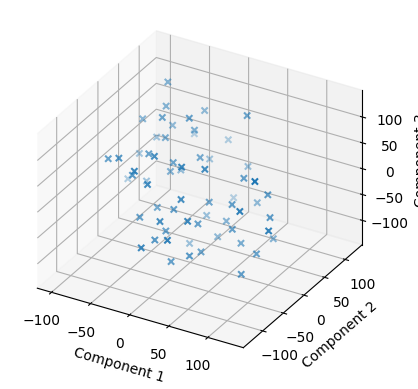

In [15]:
# Plotting the results in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot without perspective (orthographic projection)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], marker = 'x')
ax.set_proj_type('ortho')  # Setting orthographic projection

# Labeling axes
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Show the plot
plt.show()


[0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209 0.00099209
 0.00099209 0.00099209 0.00099209 0.00099209]


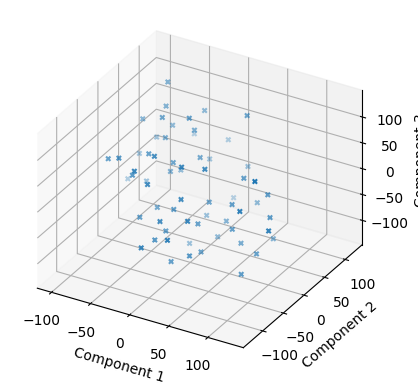

In [16]:
from sklearn.neighbors import KernelDensity
from mpl_toolkits.mplot3d import Axes3D

# Compute kernel density estimates for each point in the t-SNE data
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(X_tsne)
densities = kde.score_samples(X_tsne)  # Log density
densities = np.exp(densities)  # Convert log density to actual density
print(densities)

# Scale densities for marker sizes in the plot
density_scale = 10**4  # Scale factor for better visualisation
marker_sizes = densities * density_scale

# Creating the 3D scatter plot with marker sizes based on local kernel density
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot without perspective, marker sizes based on density
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], marker='x', s=marker_sizes)

# Setting orthographic projection
ax.set_proj_type('ortho')

# Labeling axes
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Show the plot
plt.show()

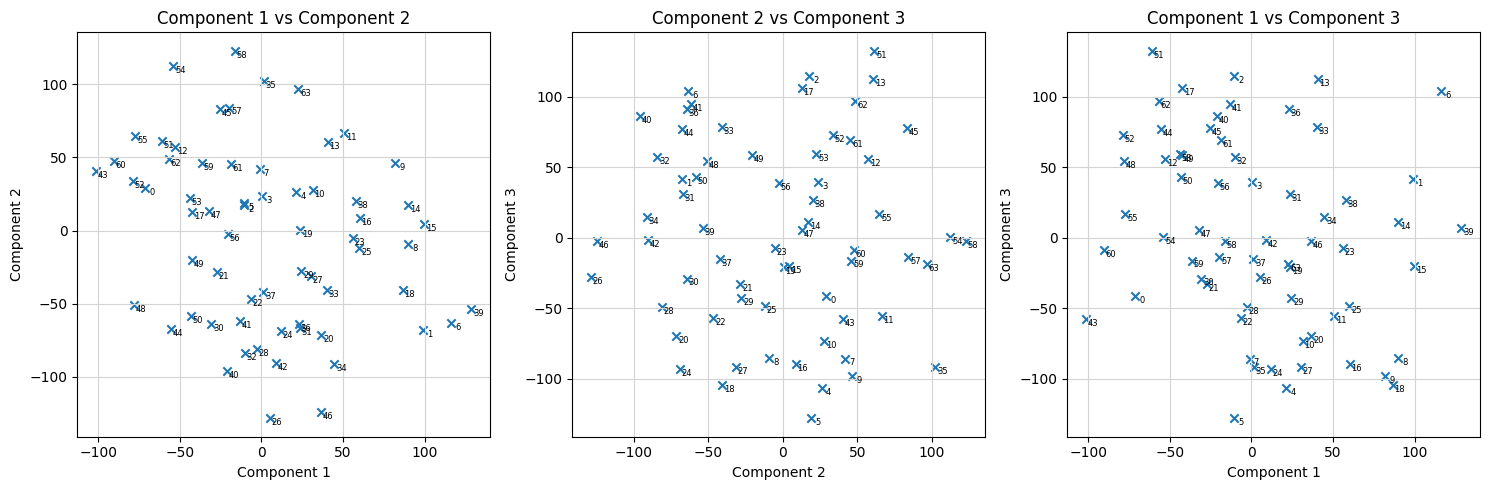

In [17]:
# Adjusting the annotation font size and adding gridlines to the scatter plots

# Re-creating the subplots with smaller font size for annotations and added gridlines
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define a function for plotting and annotating with smaller font and gridlines
def plot_and_annotate(ax, x_data, y_data, title, xlabel, ylabel):
    ax.scatter(x_data, y_data, marker = 'x')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, color = 'lightgrey')  # Adding gridlines
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        ax.annotate(i, (x, y), textcoords="offset points", xytext=(5,-5), ha='center', fontsize=6)  # Smaller font size

# Component 1 vs Component 2 with annotations
plot_and_annotate(axs[0], X_tsne[:, 0], X_tsne[:, 1], 'Component 1 vs Component 2', 'Component 1', 'Component 2')

# Component 2 vs Component 3 with annotations
plot_and_annotate(axs[1], X_tsne[:, 1], X_tsne[:, 2], 'Component 2 vs Component 3', 'Component 2', 'Component 3')

# Component 1 vs Component 3 with annotations
plot_and_annotate(axs[2], X_tsne[:, 0], X_tsne[:, 2], 'Component 1 vs Component 3', 'Component 1', 'Component 3')

# Display the annotated plots
plt.tight_layout()
plt.show()


[24.49929678 11.24275166 31.80497545 29.90381709 25.99216421 31.83743967
 11.15528106 26.75478506 18.75260602 12.3776388  24.43542144 13.74572909
 27.73895422 16.33772663 16.60626208 15.02530765 24.15895484 29.83110169
 16.23050646 27.33533723 24.6642589  26.93181469 31.63523123 24.46561897
 32.03853796 23.47739861 11.16549343 26.46238879 29.5737991  27.34312516
 25.52988827 29.78944053 27.23077651 24.13480009 17.97223914 13.33515478
 30.13374304 31.40302563 23.20973291  9.35647856 19.43421628 31.13533161
 26.84760844 13.57847973 14.97115346 18.73244672 11.30051535 31.74967261
  8.98566842 22.69958172 21.21123018 25.47288545 22.53285714 31.57093316
  9.66901972 21.06029328 30.07024365 18.2123486  10.06187342 31.00707997
 18.91708656 29.24371355 29.46058761 11.55411279]
[21.58176763 21.57593241 11.53666751 21.46867966 15.25279959 10.01684755
 14.81302804 17.15321429 18.10949439 14.57264147 20.04647664 14.3468081
 16.59505257 11.97144059 23.17702732 23.80960698 18.31593343 12.56494918
 1

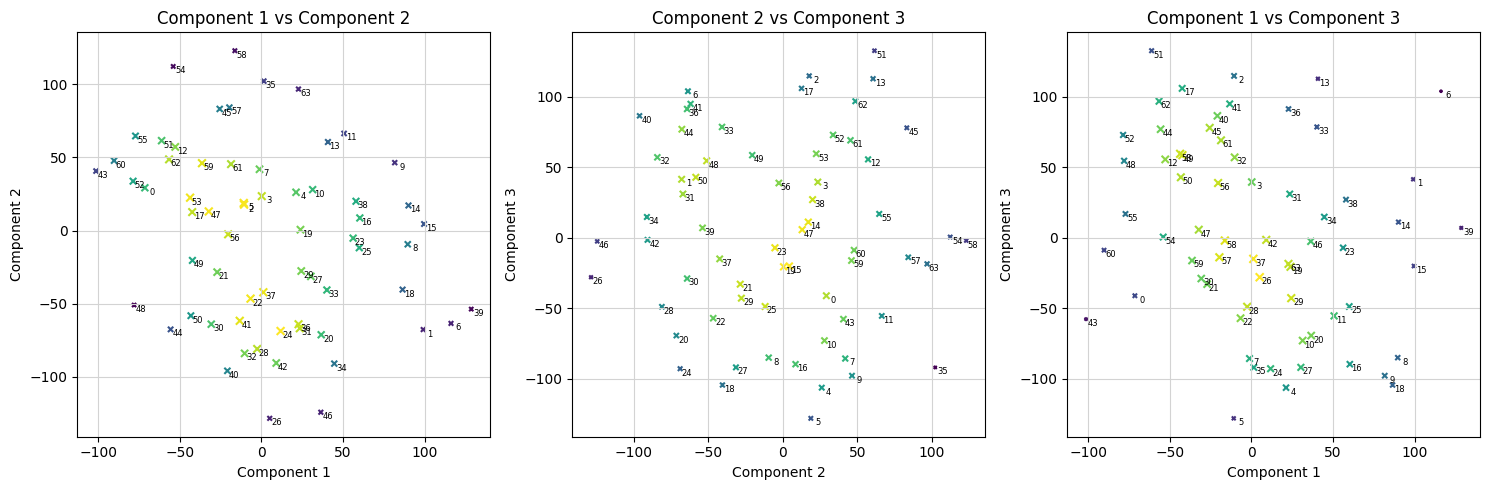

In [18]:
from scipy.stats import gaussian_kde

# Re-creating the subplots with density-based marker sizes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define a function for plotting and annotating with density-based marker sizes
def plot_and_annotate(ax, x_data, y_data, title, xlabel, ylabel):
    # Calculating the point density
    xy = np.vstack([x_data, y_data])
    scale = 10**6
    z = gaussian_kde(xy)(xy)*scale

    # Scatter plot with density-based marker sizes
    ax.scatter(x_data, y_data, s=z, marker='x', c=z)  # Scaling marker size by density
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, color='lightgrey')  # Adding gridlines
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        ax.annotate(i, (x, y), textcoords="offset points", xytext=(5,-5), ha='center', fontsize=6)  # Smaller font size
    print(z)

# Component 1 vs Component 2 with density-based marker sizes
plot_and_annotate(axs[0], X_tsne[:, 0], X_tsne[:, 1], 'Component 1 vs Component 2', 'Component 1', 'Component 2')

# Component 2 vs Component 3 with density-based marker sizes
plot_and_annotate(axs[1], X_tsne[:, 1], X_tsne[:, 2], 'Component 2 vs Component 3', 'Component 2', 'Component 3')

# Component 1 vs Component 3 with density-based marker sizes
plot_and_annotate(axs[2], X_tsne[:, 0], X_tsne[:, 2], 'Component 1 vs Component 3', 'Component 1', 'Component 3')

# Display the annotated plots
plt.tight_layout()
plt.show()


## Save CSV

In [19]:
# Convert the list to an array
my_array = np.array(output)

# Save the array as a CSV file
f_name = 'latent_space_mix' #@param{type:'string'}
np.savetxt(f_name + '.csv', my_array, delimiter=',')

## Save Model

In [20]:
"""
from pathlib import Path
features = np.stack(low_matrix, axis=0)

# rootfolder2 = Path + '_features'
rootfolder2 = '/content/drive/My Drive/'
fileName = os.path.join(rootfolder2,'pca_pool')
fileObject = open(fileName, 'wb')
pkl.dump(features, fileObject)
fileObject.close()
"""

"\nfrom pathlib import Path\nfeatures = np.stack(low_matrix, axis=0)\n\n# rootfolder2 = Path + '_features'\nrootfolder2 = '/content/drive/My Drive/'\nfileName = os.path.join(rootfolder2,'pca_pool')\nfileObject = open(fileName, 'wb')\npkl.dump(features, fileObject)\nfileObject.close()\n"